In [8]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare
import seaborn as sns

#генерируем наборы данных
data_a = np.random.normal(loc=10, scale=5, size=10000)
data_b = np.random.normal(loc=12, scale=5, size=10000)

#вычисляем разность медиан с помощью bootstrap_ab
median_difference = bs.bootstrap_ab(data_a, data_b, stat_func=bs_stats.median, compare_func=np.subtract)

print(f"Разница между медианами data_a и data_b: {median_difference.value}")



Разница между медианами data_a и data_b: -1.910726076354047


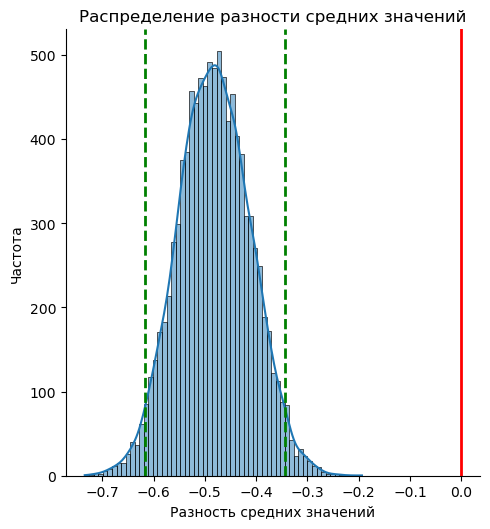

In [38]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare
import seaborn as sns
import matplotlib.pyplot as plt

# генерация выборок
test = np.random.normal(loc=10, scale=5, size=10000)
ctrl = np.random.normal(loc=10.5, scale=5, size=10000)

# вычисляем разность средних значений с помощью bootstrap_ab и сохраняем распределение
mean_difference = bs.bootstrap_ab(test=test, ctrl=ctrl,
                                  stat_func=bs_stats.mean,
                                  compare_func=bs_compare.difference,
                                  return_distribution=True)

# получаем 95% доверительный интервал
ci_lower, ci_upper = np.percentile(mean_difference, [2.5, 97.5])

# визуализация распределения
sns.displot(mean_difference, kde=True)
plt.title('Распределение разности средних значений')
plt.xlabel('Разность средних значений')
plt.ylabel('Частота')

# отображаем линию статистической значимости
plt.axvline(x=0, color='r', linewidth=2)

# отображаем доверительный интервал
plt.axvline(x=ci_lower, color='g', linestyle='--', linewidth=2)
plt.axvline(x=ci_upper, color='g', linestyle='--', linewidth=2)

# отображаем график
plt.show()


In [25]:
import numpy as np
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare

# сгенерируем выборки
n1, n2 = 1000, 1000
ratings1 = np.random.randint(low=1, high=11, size=n1)
ratings2 = np.random.randint(low=1, high=11, size=n2)

# вычисляем разницу между группами

result = bs.bootstrap_ab(ratings1, ratings2,
                          stat_func=bs_stats.mean,
                          compare_func=bs_compare.difference)

diff = result.value

# получаем 95% доверительный интервал
ci_lower, ci_upper = np.percentile(diff, [2.5, 97.5])

# выводим результаты
print(f'Средняя оценка группы 1: {round(np.mean(ratings1), 2)}')
print(f'Средняя оценка группы 2: {round(np.mean(ratings2), 2)}')
print(f'Разность между группами: {round(np.mean(diff), 2)}')
print(f'95% доверительный интервал: ({round(ci_lower, 2)}, {round(ci_upper, 2)})')

Средняя оценка группы 1: 5.74
Средняя оценка группы 2: 5.6
Разность между группами: 0.14
95% доверительный интервал: (0.14, 0.14)
